Alex Medina | Problem Set #1

**Problem 1:**

- Writing program to print values of 
Write a program to print out the value of x and ln(x) where x ranges from 1 to 10 in steps of 0.5.

In [ ]:
#Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#To execute problem
for i in range(2,21):
    print(i/2.0, m.log(i/2.0))

1.0 0.0
1.5 0.4054651081081644
2.0 0.6931471805599453
2.5 0.9162907318741551
3.0 1.0986122886681098
3.5 1.252762968495368
4.0 1.3862943611198906
4.5 1.5040773967762742
5.0 1.6094379124341003
5.5 1.7047480922384253
6.0 1.791759469228055
6.5 1.8718021769015913
7.0 1.9459101490553132
7.5 2.0149030205422647
8.0 2.0794415416798357
8.5 2.1400661634962708
9.0 2.1972245773362196
9.5 2.2512917986064953
10.0 2.302585092994046


**Problem 2:**  

- Exoplanets orbiting stars are sometimes too faint to be seen but can be identified if their orbit takes them between us and their host star, blocking out some light dimming the star as seen on Earth.
- The function computes how much a star is dimmed based on ttwo parameters: how big the star is and where it is along the orbit.
- Modeled transit as an eclipse of a spherical star in figure 1. The observed flux relative to the unobscured flux is *F(p, z)*, such that:

\begin{equation}
F(p, z) = 1 - \lambda(p, |z|),
\end{equation}

where

\begin{equation}
\lambda(p, z) =
\begin{cases}
0 & 1 + p < z \\
\frac{1}{\pi} \left[ p^2 \kappa_1 + \kappa_0 - \frac{1}{2} \sqrt{4z^2 - (1 + z^2 - p^2)^2 } \right] & |1 - p| < z \leq 1 + p \\
p^2 & z \leq 1 - p \\
1 & z \leq p - 1
\end{cases}
\end{equation}

with

\begin{equation}
\kappa_1 = \cos^{-1} \left( \frac{1 - p^2 + z^2}{2z} \right)
\end{equation}

and

\begin{equation}
\kappa_0 = \cos^{-1} \left( \frac{p^2 + z^2 - 1}{2pz} \right)
\end{equation}

- We evaluate for $p = 0.2$ and $z$ ranging from -1.2 to 1.2 in steps of 0.05.

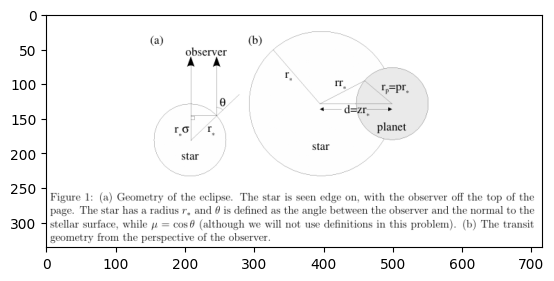

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

figure1 = mpimg.imread(r"C:\Users\Alex\Desktop\Columbia Coursework\Modeling the Universe\pset1_image.png")

plt.imshow(figure1)

In [7]:
#First, I am going to define lambda, since its just an IF function and F depends on lambda

def lambda_fct(p, z):
    #Case when the planet is off of the star entirely
    if z > 1 + p:
        return 0

    #Case where the planet is bigger than the star (i.e. eclipse)
    elif z <= p - 1:   
        return 1

    #Case where the planet is entirely on the star 
    elif z <= 1 - p:   
        return p*p       
    
    #Now the big part is for partial obscuration
    elif (m.fabs(1 - p) < z) and (z <= (1 + p)):
        
        root = 0.5 * np.sqrt(4 * z**2 - (1 + z**2 - p**2)**2)
        k0 = (p**2 + z**2 - 1) / (2 * p * z)  
        k1 = (1 - p**2 + z**2) / (2 * z)  
        kappa_0  = m.acos(k0)
        kappa_1  = m.acos(k1)
        
        #print(sqrt_fact, kappa_0, kappa_1)
        return (1 / m.pi) * (p**2 * kappa_0 + kappa_1 - root)
    
    #Error flag
    else:
        print("unexpected value: z=", z)   
        return -999

In [9]:
#Using p = 0.2 and z ranging from -1.2 to 1.2 in steps of 0.5

#How many numbers we need for z
numb_z = round((1.2*2.0 / 0.05) +1.0)
print(numb_z)

49


In [10]:
#Setting up the z array

z = np.zeros(int(numb_z))   
i = np.arange(numb_z)
z = -1.2 + i * 0.05

In [11]:
#Now, we can test for all z, with p =0.2
#Noting that negative values are irrelevant, as lambda_fct is called from F with abs(z)
for z_i in z:
    print(z_i, lambda_fct(0.2, z_i))

-1.2 1
-1.15 1
-1.0999999999999999 1
-1.0499999999999998 1
-1.0 1
-0.95 1
-0.8999999999999999 1
-0.8499999999999999 1
-0.7999999999999999 0.04000000000000001
-0.75 0.04000000000000001
-0.7 0.04000000000000001
-0.6499999999999999 0.04000000000000001
-0.5999999999999999 0.04000000000000001
-0.5499999999999999 0.04000000000000001
-0.4999999999999999 0.04000000000000001
-0.44999999999999996 0.04000000000000001
-0.3999999999999999 0.04000000000000001
-0.34999999999999987 0.04000000000000001
-0.29999999999999993 0.04000000000000001
-0.2499999999999999 0.04000000000000001
-0.19999999999999996 0.04000000000000001
-0.1499999999999999 0.04000000000000001
-0.09999999999999987 0.04000000000000001
-0.04999999999999982 0.04000000000000001
2.220446049250313e-16 0.04000000000000001
0.050000000000000044 0.04000000000000001
0.10000000000000009 0.04000000000000001
0.15000000000000013 0.04000000000000001
0.20000000000000018 0.04000000000000001
0.2500000000000002 0.04000000000000001
0.30000000000000004 0.0

In [ ]:
#Now that we have all the values, we can print F_e
#Noting it's dependent on the absolute value of z
#I also used round() to avoid printing out 2.22e-16 for zero.

f_fct = np.zeros(int(round(numb_z)))
i = 0
for z_i in z: 
    f_fct[i] = 1 - lambda_fct(0.2, m.fabs(z_i))
    print(round(z_i, 2), f_fct[i])
    i += 1

-1.2 1.0
-1.15 0.997335263983016
-1.1 0.9926934503699995
-1.05 0.987042673242156
-1.0 0.9808496779305925
-0.95 0.9745022090966324
-0.9 0.9684170049114547
-0.85 0.963163262765105
-0.8 0.96
-0.75 0.96
-0.7 0.96
-0.65 0.96
-0.6 0.96
-0.55 0.96
-0.5 0.96
-0.45 0.96
-0.4 0.96
-0.35 0.96
-0.3 0.96
-0.25 0.96
-0.2 0.96
-0.15 0.96
-0.1 0.96
-0.05 0.96
0.0 0.96
0.05 0.96
0.1 0.96
0.15 0.96
0.2 0.96
0.25 0.96
0.3 0.96
0.35 0.96
0.4 0.96
0.45 0.96
0.5 0.96
0.55 0.96
0.6 0.96
0.65 0.96
0.7 0.96
0.75 0.96
0.8 0.96
0.85 0.9631632627651049
0.9 0.9684170049114549
0.95 0.9745022090966324
1.0 0.9808496779305925
1.05 0.987042673242156
1.1 0.9926934503699995
1.15 0.997335263983016
1.2 1.0


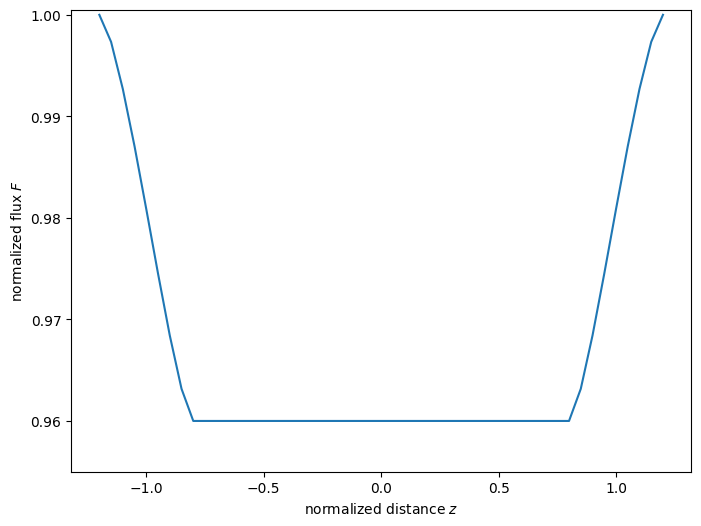

In [15]:
#To plot

fig = plt.figure(figsize=(8,6))
plt.plot(z,f_fct)
plt.xlabel('normalized distance $z$')
plt.ylabel('normalized flux $F$')
plt.ylim(0.955,1.0005)
plt.show()

**Problem 3: Simple Numerical Integration**  

- Writing a code to compute an integral using the rectangle rule as:

\begin{equation}
\int_{x_0}^{x_N} f(x)\,dx \approx \sum_{i=0}^{N-1} f(x_i)\, \Delta x
\end{equation}

where  

\begin{equation}
\Delta x = \frac{x_N - x_0}{N}
\end{equation}

and

\begin{equation}
x_i = x_0 + i\, \Delta x
\end{equation}

- We evaluate $f(x) = \sin(x)$ over the interval $x = [0, \pi / 2]$.
- Trying for different values of N and determine fractional error.

In [ ]:
def rect_int(integrand, lim_0, lim_1, numb_x):

    #Defining deltax; rectangle width
    delx = (lim_1 - lim_0) / float(numb_x)
    
    result = 0
    for i in np.arange(int(numb_x)):
        #the current ordinate
        x = lim_0 + i * delx
        #using the function provided
        f_x = integrand(x)    
        #a += 1 same as a = a + 1   
        result += f_x*delx
    return result

In [ ]:
#We know that the integral of sinx from 0 to pi/2 is just 1
#So running it for various N
for n in range(1,5):  #check how well this converges with nx
    print(10**n, abs(rect_int(np.sin, 0, m.pi/2, 10**n)))

10.0 0.9194031700146124
100.0 0.9921254566056334
1000.0 0.9992143962198363
10000.0 0.9999214581274958


In [ ]:
#Comparing it to 1
for n in range(1,5):
    print(10**n, abs(rect_int(np.sin, 0, m.pi/2, 10**n)-1)/1)

10.0 0.08059682998538764
100.0 0.007874543394366551
1000.0 0.0007856037801636795
10000.0 7.854187250422306e-05


It is clear that the error decreases as 1/N, meaning that the method is first-order.